# Proyecto X

## Lectura de los datos y exploración de los encabezados de los archivos.

In [ ]:
import pandas as pd

In [ ]:
geolocation = pd.read_csv('/content/Copia de ecommerce_geolocation_dataset.csv')
customers = pd.read_csv('/content/Copia de ecommerce_customers_dataset.csv')
order_items = pd.read_csv('/content/Copia de ecommerce_order_items_dataset.csv')
order_payments = pd.read_csv('/content/Copia de ecommerce_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/Copia de ecommerce_order_reviews_dataset.csv')
orders = pd.read_csv('/content/Copia de ecommerce_orders_dataset.csv')
products = pd.read_csv('/content/Copia de ecommerce_products_dataset.csv')
sellers = pd.read_csv('/content/Copia de ecommerce_sellers_dataset.csv')
category_names = pd.read_csv('/content/Copia de product_category_name_translation.csv')

In [ ]:
print(geolocation.columns.tolist())

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [ ]:
print(customers.columns.tolist())

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [ ]:
print(order_items.columns.tolist())

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [ ]:
print(order_payments.columns.tolist())

['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


In [ ]:
print(order_reviews.columns.tolist())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [ ]:
print(orders.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [ ]:
print(products.columns.tolist())

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [ ]:
print(sellers.columns.tolist())

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [ ]:
print(category_names.columns.tolist())

['product_category_name', 'product_category_name_english']


## BBT1-14 Creación de la base de datos y carga de datos

**Descripción**
Crear una conexión a la base de datos de SQLite llamada ecommerce.db
Importar los archivos y Guardar los DataFrames en la base de datos como tablas:

ecommerce_customers_dataset.csv

ecommerce_order_items_dataset.csv

ecommerce_order_payments_dataset.csv

ecommerce_order_reviews_dataset.csv

ecommerce_orders_dataset.csv

ecommerce_products_dataset.csv

ecommerce_sellers_dataset.csv

product_category_name_translation.csv


In [ ]:
import sqlite3 as sql


#Conexion a la base de datos
conn = sql.connect('ecommerce.db')
cursor = conn.cursor()

#script de creacion de tablas
script = '''
CREATE TABLE products (
    product_id TEXT PRIMARY KEY,
    product_category_name TEXT,
    product_name_lenght REAL,
    product_description_lenght REAL,
    product_photos_qty REAL,
    product_weight_g REAL,
    product_length_cm REAL,
    product_height_cm REAL,
    product_width_cm REAL
);
CREATE TABLE order_items (
    order_id TEXT,
    order_item_id INTEGER,
    product_id TEXT,
    seller_id TEXT,
    shipping_limit_date TEXT,
    price REAL,
    freight_value REAL,
    PRIMARY KEY (order_id, order_item_id)
);
CREATE TABLE order_payments (
    order_id TEXT,
    payment_sequential INTEGER,
    payment_type TEXT,
    payment_installments INTEGER,
    payment_value REAL,
    PRIMARY KEY(order_id,payment_sequential)
);
CREATE TABLE orders (
    order_id TEXT PRIMARY KEY,
    customer_id TEXT,
    order_status TEXT,
    order_purchase_timestamp TEXT,
    order_approved_at TEXT,
    order_delivered_carrier_date TEXT,
    order_delivered_customer_date TEXT,
    order_estimated_delivery_date TEXT
);
CREATE TABLE customers (
    customer_id TEXT PRIMARY KEY,
    customer_unique_id TEXT,
    customer_zip_code_prefix INTEGER,
    customer_city TEXT,
    customer_state TEXT
);
CREATE TABLE geolocation(
  geolocation_zip_code_prefix INTEGER PRIMARY KEY ,
  geolocation_lat REAL,
  geolocation_lng REAL,
  geolocation_city TEXT,
  geolocation_state TEXT
);
CREATE TABLE order_review(
  review_id TEXT,
  order_id TEXT,
  review_score INT,
  review_comment_title TEXT,
  review_comment_message TEXT,
  review_creation_date TEXT,
  review_answer_timestamp TEXT
  PRIMARY KEY(order_id,review_id)
);
CREATE TABLE sellers(
  seller_id TEXT PRIMARY KEY,
  seller_zip_code_prefix INTEGER,
  seller_city TEXT,
  seller_state TEXT
);
CREATE TABLE category(
  product_category_name TEXT,
  product_category_name_english TEXT
);
'''
#cursor.executescript(script)
conn.commit()


Inserción de los datos de los csv a la base de datos

In [ ]:
geolocation.to_sql('geolocation',conn, index=True, if_exists='replace')
customers.to_sql('customers',conn, index=True, if_exists='replace')
order_items.to_sql('order_items',conn, index=True, if_exists = 'replace')
order_payments.to_sql('order_payments',conn, index=True, if_exists = 'replace')
order_reviews.to_sql('order_review',conn, index=True, if_exists = 'replace')
orders.to_sql('orders',conn, index=True, if_exists = 'replace')
products.to_sql('products',conn, index=True, if_exists = 'replace')
sellers.to_sql('sellers',conn, index=True, if_exists = 'replace')
category_names.to_sql('category',conn, index=True, if_exists = 'replace')

71

Creación de tabla geolocation2 con latitudes y longitudes promedio

Con el fin de evitar la duplicidad de datos usando el criterio de promediar latitudes y longitudes agrupando por código postal.

In [ ]:
query_geo = '''
  SELECT geolocation_zip_code_prefix, AVG(geolocation_lat) as promedio_latitud, AVG(geolocation_lng) as promedio_longitud, geolocation_city, geolocation_state
  FROM geolocation
  GROUP BY geolocation_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix;
  '''
geo_2 = pd.read_sql_query(query_geo, conn)
geo_2

geo_2.set_index('geolocation_zip_code_prefix', inplace=True)

In [ ]:
geo_2.to_sql('geolocation2', conn, index=True, if_exists='replace')

19015

Creación de tabla geolocation2 con latitudes y longitudes promedio

Con el fin de evitar la duplicidad de datos usando el criterio de promediar latitudes y longitudes agrupando por código postal.

In [ ]:
query_geo = '''
  SELECT geolocation_zip_code_prefix, AVG(geolocation_lat) as promedio_latitud, AVG(geolocation_lng) as promedio_longitud, geolocation_city, geolocation_state
  FROM geolocation
  GROUP BY geolocation_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix;
  '''
geo_2 = pd.read_sql_query(query_geo, conn)
print(geo_2.head(5))

geo_2.set_index('geolocation_zip_code_prefix', inplace=True)

   geolocation_zip_code_prefix  promedio_latitud  promedio_longitud  \
0                         1001        -23.550190         -46.634024   
1                         1002        -23.548146         -46.634979   
2                         1003        -23.548994         -46.635731   
3                         1004        -23.549799         -46.634757   
4                         1005        -23.549456         -46.636733   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [ ]:
geo_2.to_sql('geolocation2', conn, index=True, if_exists='replace')

19015

## BBT1-18 - Extracción de datos desde las tablas customers y orders

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla customers y tabla orders.

PARA: Extraer los datos de clientes con sus ordenes

In [ ]:
query_1 = '''
SELECT c.customer_unique_id,c.customer_zip_code_prefix,c.customer_city, c.customer_state,
      o.customer_id,o.order_status,o.order_purchase_timestamp,o.order_approved_at,o.order_delivered_carrier_date ,o.order_delivered_customer_date ,o.order_estimated_delivery_date
FROM customers AS c
JOIN orders as o ON c.customer_id = o.customer_id;

'''
df_customers_orders = pd.read_sql_query(query_1, conn)

df_customers_orders.head(5)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


## BBT1-19  Extracción de datos desde las tablas orders y orders_items

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla orders_items.

PARA: Extraer los datos de ordenes con sus items

In [ ]:
query_2 = '''
SELECT o.customer_id,o.order_status,o.order_purchase_timestamp,o.order_approved_at,o.order_delivered_carrier_date ,o.order_delivered_customer_date ,o.order_estimated_delivery_date,
       oi.order_id, oi.order_item_id , oi.product_id , oi.seller_id , oi.shipping_limit_date , oi.price  , oi.freight_value
FROM orders AS o
JOIN order_items AS oi ON o.order_id = oi.order_id;
'''
df_orders_ordersitems = pd.read_sql_query(query_2,conn)
df_orders_ordersitems.head(5)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


## BBT1-20  Extracción de datos desde las tablas orders_items y sellers

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders_items y tabla sellers.

PARA: Extraer los datos de items con por sellers

In [ ]:
query_3 = '''
SELECT oi.order_id, oi.order_item_id , oi.product_id , oi.seller_id , oi.shipping_limit_date , oi.price  , oi.freight_value,
        s.seller_zip_code_prefix, s.seller_city, s.seller_state
FROM order_items AS oi
JOIN sellers AS s ON oi.seller_id = s.seller_id;
'''
df_orderitems_sellers = pd.read_sql_query(query_3, conn)
df_orderitems_sellers.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


## BBT1-21  Extracción de datos desde las tablas orders_items y products

**Descripción**
COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders_items y tabla products.

PARA: Extraer los datos de items con por categorias

In [ ]:
BBT1_21_query = '''
SELECT oi.*, p.*
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
ORDER BY p.product_category_name ASC;
'''

BBT1_21 = pd.read_sql_query(BBT1_21_query, conn)
BBT1_21.head(5)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,12613,ff6caf9340512b8bf6d2a2a6df032cfa,None,NaN,NaN,NaN,200.0,16.0,5.0,12.0
1,125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,25314,a9c404971d1a5b1cbc2e4070e02731fd,None,NaN,NaN,NaN,700.0,35.0,14.0,11.0
2,132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,29568,5a848e4ab52fd5445cdc07aab1c40e48,None,NaN,NaN,NaN,400.0,20.0,12.0,15.0
3,142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,30674,41eee23c25f7a574dfaf8d5c151dbb12,None,NaN,NaN,NaN,200.0,16.0,2.0,11.0
4,171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,244,e10758160da97891c2fdcbc35f0f031d,None,NaN,NaN,NaN,2200.0,16.0,2.0,11.0


## BBT1-22 Extracción de datos desde las tablas order y payments

**Descripción**
COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla payments.  

PARA: Extraer los datos de órdenes con sus pagos asociados

In [ ]:
BBT1_22_query = '''
  SELECT o.*, op.*
  FROM orders o
  JOIN order_payments op ON o.order_id = op.order_id;
'''

BBT1_22 = pd.read_sql_query(BBT1_22_query, conn)
BBT1_22.head(5)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10770,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,44246,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,91130,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7652,53cdb2fc8bc7dce0b6741e2150273451,1,boleto,1,141.46
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,11176,47770eb9100c2d0c44946d9cf07ec65d,1,credit_card,3,179.12


## BBT1-23 Extracción de datos desde las tablas customers y geolocation2

**Descripción**
COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla customers y tabla geolocation.
  
PARA: Extraer los datos de customers con sus latitudes y longitudes

In [ ]:
query_bbt1_23 = '''
  SELECT customer_unique_id, geolocation_zip_code_prefix, promedio_latitud, promedio_longitud
  FROM customers c
  JOIN geolocation2 g
  ON g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
  GROUP BY customer_unique_id
  ORDER BY customer_zip_code_prefix
  '''
cust_geo = pd.read_sql_query(query_bbt1_23, conn)
cust_geo.head(5)

,customer_unique_id,geolocation_zip_code_prefix,promedio_latitud,promedio_longitud
0,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,-23.548994,-46.635731
1,095e7c124c5c1ccb1eb9f731152eae6a,1004,-23.549799,-46.634757
2,968f6d2f674977d88a4b445a5117ccd8,1004,-23.549799,-46.634757
3,57f0ea1c7f6b9ef8615c0a0b8f06fe57,1005,-23.549456,-46.636733
4,84a7776f914ff19505e44effba86455f,1005,-23.549456,-46.636733


## BBT1-24 Extracción de datos desde las tablas orders y geolocation2

**Descripción**
COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla geolocation.
  
PARA: Extraer los datos de órdenes con sus latitudes y longitudes

In [ ]:
query_bbt1_24 = '''
  SELECT order_id, geolocation_zip_code_prefix, promedio_latitud, promedio_longitud
  FROM customers c
  JOIN orders o
  ON c.customer_id = o.customer_id
  JOIN geolocation2 g
  ON g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix
  LIMIT 10
  '''
orders_geo = pd.read_sql_query(query_bbt1_24, conn)
orders_geo.head(5)

,order_id,geolocation_zip_code_prefix,promedio_latitud,promedio_longitud
0,d454d6650d375ebc3f9667a4d2fe161c,1003,-23.548994,-46.635731
1,3fe4ba391eeff167bfdda2c590013b02,1004,-23.549799,-46.634757
2,ed415dd934c5bb15a4a2fd223bb0a43e,1004,-23.549799,-46.634757
3,08cae26133a5501cdf7b13db6bcf39e6,1005,-23.549456,-46.636733
4,ae28255c7b837ba319c9cbf1dfeeea0d,1005,-23.549456,-46.636733


## BBT1-25 Extracción de datos desde las tablas orders y reviews

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla reviews.

PARA: Extraer los datos de órdenes con sus scores

In [ ]:
query_bbt1_25 = '''
  SELECT o.order_id, review_score
  FROM orders o
  JOIN order_review r
  ON o.order_id = r.order_id
  ORDER BY review_score
  LIMIT 10
  '''
orders_score = pd.read_sql_query(query_bbt1_25, conn)
orders_score.head(5)

,order_id,review_score
0,76c6e866289321a7c93b82b54852dc33,1
1,e6ce16cb79ec1d90b1da9085a6118aeb,1
2,acce194856392f074dbf9dada14d8d82,1
3,1790eea0b567cf50911c057cf20f90f9,1
4,6ea2f835b4556291ffdc53fa0b3b95e8,1


## BT1-26 Extracción de datos desde las tablas orders_items, products y products_category_translation

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders_items, tabla products y product_category_name_translation.  

PARA: Extraer los datos de items con por categorias pero con su nombre traducido en inglés

In [ ]:
bt1_26_query = '''
    SELECT oi.*, c.product_category_name_english AS product_name
    FROM order_items AS oi
    INNER JOIN products AS p
        ON oi.product_id = p.product_id
    INNER JOIN category AS c
        ON p.product_category_name = c.product_category_name_english
;
'''
BT1_26 = pd.read_sql_query(bt1_26_query, conn)
BT1_26.head(5)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop
2,16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.0,11.34,consoles_games
3,19,000e562887b1f2006d75e0be9558292e,1,5ed9eaf534f6936b51d0b6c5e4d5c2e9,8cbac7e12637ed9cffa18c7875207478,2018-02-28 12:08:37,25.0,16.11,cool_stuff
4,24,0010b2e5201cc5f1ae7e9c6cc8f5bd00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-09-15 18:04:37,48.9,16.60,cool_stuff


## BT1_27  Extracción de datos desde las tablas orders, payments y customers

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders, tabla payments y customers.
  
PARA: Extraer los datos de clientes con sus métodos de pagos por ciudad.

In [ ]:
bt1_27_query = '''
    SELECT c.customer_unique_id, op.payment_type, c.customer_city, c.customer_state
    FROM customers AS c
    INNER JOIN orders AS o
        ON c.customer_id = o.customer_id
    INNER JOIN order_payments AS op
        ON o.order_id = op.order_id

;
'''
BT1_27 = pd.read_sql_query(bt1_27_query, conn)

BT1_27.groupby(['payment_type'])[['customer_unique_id']].count().sort_values(by='customer_unique_id', ascending=False)

BT1_27.head(5)

,customer_unique_id,payment_type,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,credit_card,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,credit_card,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,credit_card,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,credit_card,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,credit_card,campinas,SP


## BBT1-28 Filtrar datos, reducir volumen de customers y orders.

**Descripción**

COMO: desarrollador

QUIERO: Filtrar el DataFrame de clientes y órdenes para resguardar las 3 órdenes más actuales de cada cliente.

PARA: Reducir el volumen de datos y trabajar solo con las últimas órdenes de los clientes.

In [ ]:
# Renombrar la columna 'index' a 'customer_order_index' en el DataFrame
df_customers_orders.rename(columns={'index': 'customer_order_index'}, inplace=True)

# Guardar el DataFrame en la base de datos sin incluir el índice
df_customers_orders.to_sql('customers_orders', conn, if_exists='replace', index=False)


99441

In [ ]:
query_2 = '''
WITH ComprasClientes AS (
    SELECT
        c.customer_unique_id,
        o.order_id,
        order_purchase_timestamp,
        ROW_NUMBER() OVER (PARTITION BY c.customer_unique_id ORDER BY o.order_purchase_timestamp DESC) AS rn
    FROM
        customers AS c
    JOIN
        orders AS o ON c.customer_id = o.customer_id
    JOIN
        order_payments AS op ON o.order_id = op.order_id
    WHERE
        o.order_status != 'canceled'
)
SELECT
    cc.customer_unique_id,
    cc.order_id,
    cc.order_purchase_timestamp
FROM
    ComprasClientes AS cc
WHERE
    cc.rn <= 3
GROUP BY
    cc.customer_unique_id



'''

# Ejecutar la consulta y obtener los resultados en un DataFrame
BBT1_31 = pd.read_sql_query(query_2, conn)
BBT1_31.head(5)

,customer_unique_id,order_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42


In [ ]:

num_filas, num_columnas = BBT1_31.shape

# Imprime el número de filas
print(f'Número de filas: {num_filas}')

Número de filas: 95559


## BBT1-29 Filtrar datos, reducir volumen de orders y orders_items

**Descripción**

COMO: desarrollador

QUIERO: Filtrar el DataFrame de órdenes e ítems de órdenes para resguardar los 3 items de mayor importe de compra.

PARA: Reducir el volumen de datos y trabajar solo con los ítems que mas ingreso generan.

In [ ]:
# Renombrar la columna 'index' a 'orders_items_index' en el DataFrame
df_orders_ordersitems.rename(columns={'index': 'orders_items_index'}, inplace=True)
df_orders_ordersitems.to_sql('orders_items', conn, if_exists='replace', index=False)

112650

In [ ]:
BBT1_29 = '''
WITH TopItems AS (
  SELECT
    oi.order_id,
    oi.order_item_id,
    oi.product_id,
    oi.seller_id,
    oi.shipping_limit_date,
    oi.price,
    oi.freight_value,
    ROW_NUMBER() OVER (PARTITION BY oi.order_id ORDER BY oi.price DESC) AS row_num
  FROM orders_items AS oi
)
SELECT
  o.customer_id,
  o.order_status,
  o.order_purchase_timestamp,
  o.order_approved_at,
  o.order_delivered_carrier_date,
  o.order_delivered_customer_date,
  o.order_estimated_delivery_date,
  ti.order_id,
  ti.order_item_id,
  ti.product_id,
  ti.seller_id,
  ti.shipping_limit_date,
  ti.price,
  ti.freight_value
FROM TopItems AS ti
JOIN orders AS o ON ti.order_id = o.order_id
WHERE ti.row_num <= 3
ORDER BY ti.price DESC;

'''
bt_29 = pd.read_sql_query(BBT1_29, conn)
bt_29.head(5)


,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
1,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
2,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
3,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34
4,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34


In [ ]:
resultados = bt_29[bt_29['order_id'] == '199af31afc78c699f0dbf71fb178d4d4']
resultados

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
4,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34


## BBT1- 30 Filtrar datos, reducir volumen de orders_items y sellers

**Descripción**

COMO: desarrollador

QUIERO: Filtrar el DataFrame de los vendedores e ítems para resguardar los 3 ítems de mayor importe.
  
PARA: Reducir el volumen de datos y trabajar solo con los ítems que mayor ingreso generan por vendedor.

In [ ]:
# Renombrar la columna 'index' a 'orders_items_index' en el DataFrame
df_orderitems_sellers.rename(columns={'index': 'orderitems_sellers_index'}, inplace=True)
df_orderitems_sellers.to_sql('orderitems_sellers', conn, if_exists='replace', index=False)

112650

In [ ]:
BBT1_30= '''
WITH TopItemsPerSeller AS (
  SELECT
    s.seller_id,
    oi.order_item_id,
    oi.product_id,
    oi.shipping_limit_date,
    oi.price,
    oi.freight_value,
    ROW_NUMBER() OVER (PARTITION BY s.seller_id ORDER BY oi.price DESC) AS row_num
  FROM orderitems_sellers AS oi
  JOIN sellers AS s ON oi.seller_id = s.seller_id
)
SELECT
  ti.seller_id,
--  oi.order_id,
  ti.order_item_id,
  ti.product_id,
  ti.shipping_limit_date,
  ti.price,
  ti.freight_value,
  s.seller_zip_code_prefix,
  s.seller_city,
  s.seller_state
FROM TopItemsPerSeller AS ti
--JOIN orderitems_sellers AS oi ON ti.order_item_id = oi.order_item_id
JOIN sellers AS s ON ti.seller_id = s.seller_id
WHERE ti.row_num <= 3
ORDER BY ti.seller_id, ti.price DESC;

'''
query_30 = pd.read_sql_query(BBT1_30, conn)
query_30.head(5)

,seller_id,order_item_id,product_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,1,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-12 22:24:16,895.0,21.02,9080,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,1,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-18 14:49:22,895.0,21.02,9080,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,1,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-24 23:56:20,895.0,21.02,9080,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,1,e251ebd2858be1aa7d9b2087a6992580,2017-05-05 15:10:21,199.0,17.09,29156,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,1,98a8c2fa16d7239c606640f5555768e4,2018-04-17 11:10:23,169.0,114.62,29156,cariacica,ES


## BBT1-38 Carga de datos, generacion de archivos .csv de customers y orders

**Descripción**

COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de customers y orders.

Los archivos deben cumplir los siguientes requerimientos:

*     Contener cabecera.
*   Separador “,”.



Ser guardados en un directorio llamado Results\Analysis_A.


In [ ]:
import os

In [ ]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_A'):
  os.makedirs('Results/Analysis_A')

csv_filename = 'BBT1_38.csv'

csv_path = 'Results/Analysis_A/' + csv_filename

BBT1_31.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_A/BBT1_38.csv


## BBT1-39 Carga de datos, generacion de archivos .csv de orders y orders_items

**Descripción**

COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de orders y orders_items.

Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.

Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_B.



In [ ]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_B'):
  os.makedirs('Results/Analysis_B')

csv_filename = 'BBT1_39.csv'

csv_path = 'Results/Analysis_B/' + csv_filename

bt_29.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_B/BBT1_39.csv


## BBT1-40 Carga de datos, generacion de archivos .csv de orders_items y sellers

**Descripción**
COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de orders_items y sellers.

Los archivos deben cumplir los siguientes requerimientos:

*     Contener cabecera.
*   Separador “,”.



Ser guardados en un directorio llamado Results\Analysis_A.

In [ ]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_C'):
  os.makedirs('Results/Analysis_C')

csv_filename = 'BBT1_40.csv'

csv_path = 'Results/Analysis_C/' + csv_filename

query_30.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_C/BBT1_40.csv


## BBT1-48 Extraccion de datos desde .csv, análisis A

**Descripción**

COMO: desarrollador

QUIERO: Cargar los datos del análisis A generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=385edcf4a2d18482d2e4d30c00177edd487c27cb97cbc3f4ba806c0b3a83d0db
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
path_bbt1_38 = '/content/Results/Analysis_A/BBT1_38.csv'
bbt1_48_spark = spark.read.load(path_bbt1_38, format='csv', sep=',', inferSchema='true', header='true')
bbt1_48_spark.show(5)

+--------------------+--------------------+------------------------+
|  customer_unique_id|            order_id|order_purchase_timestamp|
+--------------------+--------------------+------------------------+
|0000366f3b9a7992b...|e22acc9c116caa3f2...|     2018-05-10 10:56:27|
|0000b849f77a49e4a...|3594e05a005ac4d06...|     2018-05-07 11:11:27|
|0000f46a3911fa3c0...|b33ec3b6993371814...|     2017-03-10 21:05:03|
|0000f6ccb0745a6a4...|41272756ecddd9a9e...|     2017-10-12 20:29:41|
|0004aac84e0df4da2...|d957021f1127559cd...|     2017-11-14 19:45:42|
+--------------------+--------------------+------------------------+
only showing top 5 rows



## BBT1-49 Extraccion de datos desde .csv, análisis B

**Descripción**

COMO: desarrollador

QUIERO: Cargar los datos del análisis B generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [ ]:
path_bbt1_49 = '/content/Results/Analysis_B/BBT1_39.csv'
bbt1_49_spark = spark.read.load(path_bbt1_49, format='csv', sep=',', inferSchema='true', header='true')
bbt1_49_spark.show(5)

+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|c6e2731c5b391845f...|   delivered|     2017-02-12 20:37:36|2017-02-12 20:45:12|         2017-02-16 09:23:13|          2017-03-03 14:23:

## BBT1-50 Extraccion de datos desde .csv, análisis C

**Descripción**

COMO: desarrollador

QUIERO: Cargar los datos del análisis C generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [ ]:
path_bbt1_50 = '/content/Results/Analysis_C/BBT1_40.csv'
bbt1_50_spark = spark.read.load(path_bbt1_50, format='csv', sep=',', inferSchema='true', header='true')
bbt1_50_spark.show(5)

+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|           seller_id|order_item_id|          product_id|shipping_limit_date|price|freight_value|seller_zip_code_prefix|seller_city|seller_state|
+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-12 22:24:16|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-18 14:49:22|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-24 23:56:20|895.0|        21.02|                  9080|santo andre|          SP|
|001cca7ae9ae17fb1...|            1|e251ebd2858be1aa7...|2017-05-05 15:10:21|199.0|        17.09|                 29156|  ca

## BBT1 - 58 Creacion de vistas temporales, análisis A

**Descripción**

COMO: desarrollador

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis A.

PARA: Preparar los datos para trabajar con SparkSQL.

In [ ]:
bbt1_48_spark.createOrReplaceTempView("vista_temporal_bbt1_48")

In [ ]:
# Visualizacion
consulta_A = spark.sql('SELECT * FROM vista_temporal_bbt1_48')
consulta_A.show(5)

+--------------------+--------------------+------------------------+
|  customer_unique_id|            order_id|order_purchase_timestamp|
+--------------------+--------------------+------------------------+
|0000366f3b9a7992b...|e22acc9c116caa3f2...|     2018-05-10 10:56:27|
|0000b849f77a49e4a...|3594e05a005ac4d06...|     2018-05-07 11:11:27|
|0000f46a3911fa3c0...|b33ec3b6993371814...|     2017-03-10 21:05:03|
|0000f6ccb0745a6a4...|41272756ecddd9a9e...|     2017-10-12 20:29:41|
|0004aac84e0df4da2...|d957021f1127559cd...|     2017-11-14 19:45:42|
+--------------------+--------------------+------------------------+
only showing top 5 rows



## BBT1 - 59 Creacion de vistas temporales, análisis B

**Descripción**

COMO: desarrollador

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis B.

PARA: Preparar los datos para trabajar con SparkSQL.

In [ ]:
bbt1_49_spark.createOrReplaceTempView("vista_temporal_bbt1_49")

In [ ]:
# Visualizacion
consulta_B = spark.sql('SELECT * FROM vista_temporal_bbt1_49')
consulta_B.show(5)

+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|c6e2731c5b391845f...|   delivered|     2017-02-12 20:37:36|2017-02-12 20:45:12|         2017-02-16 09:23:13|          2017-03-03 14:23:

## BBT1 - 60 Creacion de vistas temporales, análisis C

**Descripción**

COMO: desarrollador

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis C.

PARA: Preparar los datos para trabajar con SparkSQL.

In [ ]:
bbt1_50_spark.createOrReplaceTempView("vista_temporal_bbt1_50")

In [ ]:
# Visualizacion
consulta_C = spark.sql('SELECT * FROM vista_temporal_bbt1_50')
consulta_C.show(5)

+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|           seller_id|order_item_id|          product_id|shipping_limit_date|price|freight_value|seller_zip_code_prefix|seller_city|seller_state|
+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-12 22:24:16|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-18 14:49:22|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-24 23:56:20|895.0|        21.02|                  9080|santo andre|          SP|
|001cca7ae9ae17fb1...|            1|e251ebd2858be1aa7...|2017-05-05 15:10:21|199.0|        17.09|                 29156|  ca

## BBT1 - 68 Querys en spark SQL, análisis A

**Descripción**

QUIERO: Generar una consulta que cumpla los siguientes puntos:

Totalizar por las órdenes más vendidas por cliente, año y mes sumando monto, calculando monto máximo, mínimo y promedio de compra.


PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia por cliente.


In [ ]:
#Tengo que traer la tabla order_payment
query_temp = "SELECT * FROM order_payments"
df = pd.read_sql_query(query_temp, conn)

In [ ]:
# Guardar los datos en un archivo CSV
df.to_csv('order_payments.csv', index=False)

In [ ]:
# Carga el archivo CSV en un DataFrame de PySpark
df = spark.read.csv("order_payments.csv", header=True, inferSchema=True)

In [ ]:
# Crea una vista temporal a partir del DataFrame
df.createOrReplaceTempView("vista_temporal_order_payments")

In [ ]:
# Visualizacion
df_order_payments = spark.sql('SELECT * FROM vista_temporal_order_payments')
df_order_payments.show(5)

+-----+--------------------+------------------+------------+--------------------+-------------+
|index|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+-----+--------------------+------------------+------------+--------------------+-------------+
|    0|b81ef226f3fe1789b...|                 1| credit_card|                   8|        99.33|
|    1|a9810da82917af2d9...|                 1| credit_card|                   1|        24.39|
|    2|25e8ea4e93396b6fa...|                 1| credit_card|                   1|        65.71|
|    3|ba78997921bbcdc13...|                 1| credit_card|                   8|       107.78|
|    4|42fdf880ba16b47b5...|                 1| credit_card|                   2|       128.45|
+-----+--------------------+------------------+------------+--------------------+-------------+
only showing top 5 rows



In [ ]:
query_bbt1_68 = '''
SELECT
    t.customer_unique_id,
    t.order_id,
    t.order_purchase_timestamp,
    op.payment_value AS monto
FROM
    vista_temporal_bbt1_48 AS t
JOIN
    vista_temporal_order_payments AS op
ON
    t.order_id = op.order_id;
'''

resultado_bbt1_68 = spark.sql(query_bbt1_68)
resultado_bbt1_68.show(5)


+--------------------+--------------------+------------------------+------+
|  customer_unique_id|            order_id|order_purchase_timestamp| monto|
+--------------------+--------------------+------------------------+------+
|0000366f3b9a7992b...|e22acc9c116caa3f2...|     2018-05-10 10:56:27| 141.9|
|0000b849f77a49e4a...|3594e05a005ac4d06...|     2018-05-07 11:11:27| 27.19|
|0000f46a3911fa3c0...|b33ec3b6993371814...|     2017-03-10 21:05:03| 86.22|
|0000f6ccb0745a6a4...|41272756ecddd9a9e...|     2017-10-12 20:29:41| 43.62|
|0004aac84e0df4da2...|d957021f1127559cd...|     2017-11-14 19:45:42|196.89|
+--------------------+--------------------+------------------------+------+
only showing top 5 rows



In [ ]:
query_bbt1_68 = '''
SELECT
    t.customer_unique_id,
    ANY_VALUE(t.order_id) AS order_id,  -- Usar ANY_VALUE para order_id
    YEAR(t.order_purchase_timestamp) AS anio,
    MONTH(t.order_purchase_timestamp) AS mes,
    COUNT(*) AS total_transacciones,
    ROUND(SUM(op.payment_value), 2) AS monto_total,
    ROUND(MAX(op.payment_value), 2) AS monto_max,
    ROUND(MIN(op.payment_value), 2) AS monto_min,
    ROUND(AVG(op.payment_value), 2) AS monto_promedio

FROM
    vista_temporal_bbt1_48 AS t
JOIN
    vista_temporal_order_payments AS op
ON
    t.order_id = op.order_id
GROUP BY
    t.customer_unique_id,
    anio,
    mes
HAVING
    COUNT(*) >= 1  -- Solo considerar clientes con al menos una orden
ORDER BY
    total_transacciones DESC,  -- Ordenar por transacciones descendentes
    customer_unique_id,  -- Luego por ID de cliente
    anio,  -- Luego por año
    mes  -- Finalmente por mes
'''

resultado_bbt1_68 = spark.sql(query_bbt1_68)
resultado_bbt1_68.show(5)



+--------------------+--------------------+----+---+-------------------+-----------+---------+---------+--------------+
|  customer_unique_id|            order_id|anio|mes|total_transacciones|monto_total|monto_max|monto_min|monto_promedio|
+--------------------+--------------------+----+---+-------------------+-----------+---------+---------+--------------+
|8af7ac63b2efbcbd8...|fa65dad1b0e818e3c...|2017|  4|                 29|     457.99|    150.0|      0.0|         15.79|
|569aa12b73b5f7ede...|ccf804e764ed5650c...|2017|  6|                 26|      62.68|     23.1|     0.97|          2.41|
|2524dcec233c3766f...|285c2e15bebd4ac83...|2017| 12|                 22|      40.85|     4.07|      1.0|          1.86|
|9a736b248f67d166d...|895ab968e7bb0d565...|2017|  8|                 21|     161.32|     16.7|     0.24|          7.68|
|24f12460aad399ba1...|ee9ca989fc93ba09a...|2017|  5|                 19|      82.73|    12.49|     1.68|          4.35|
+--------------------+------------------

## BBT1 - 69 Querys en spark SQL, análisis B

**Descripción**

COMO: desarrollador

QUIERO: Generar una consulta que cumpla los siguientes puntos:

Totalizar por las órdenes más vendidas año y mes de aprobacion de la orden sumando monto y promedio de compra.


PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y de aprobaciones.

In [ ]:
query_bbt1_69= """
SELECT
    SUBSTRING(order_approved_at, 1, 7) AS anio_mes_aprobacion,
    ROUND(SUM(price + freight_value),2) AS monto_total,
    ROUND(AVG(price + freight_value),2) AS monto_promedio
    --agregar columna anual
FROM
    vista_temporal_bbt1_49
GROUP BY
    SUBSTRING(order_approved_at, 1, 7)
ORDER BY
    monto_total DESC --ordenar por fecha
"""
#Preguntar si se tendria que sumar el costo de envio o no
resultado_bbt1_69 = spark.sql(query_bbt1_69)

# Mostrar los resultados
resultado_bbt1_69.show()


+-------------------+-----------+--------------+
|anio_mes_aprobacion|monto_total|monto_promedio|
+-------------------+-----------+--------------+
|            2018-05| 1162658.66|        145.24|
|            2018-03| 1152122.73|        141.17|
|            2017-11| 1144522.18|         137.1|
|            2018-04| 1122249.13|        147.24|
|            2018-01| 1088490.41|        136.45|
|            2018-07| 1024509.62|        149.59|
|            2018-08| 1024351.84|        139.69|
|            2018-06| 1016280.31|        146.23|
|            2018-02|  966941.35|        128.87|
|            2017-12|  883266.29|        137.54|
|            2017-10|  755452.07|        146.72|
|            2017-09|  702490.39|        147.03|
|            2017-08|   661638.1|        136.08|
|            2017-05|  582679.89|        142.71|
|            2017-07|  573767.68|        130.58|
|            2017-06|  503864.48|        141.42|
|            2017-03|  425452.15|        142.82|
|            2017-04

## BBT1 - 70 Querys en spark SQL, análisis C

**Descripción**

COMO: desarrollador

QUIERO: Generar una consulta que cumpla los siguientes puntos:

Totalizar por las órdenes más vendidas por ciudad del vendedor, año y mes limite de entrega sumando monto de envio y promedio de monto de envio.


PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia de los envios por ciudad del vendedor.

In [ ]:
# Ejecutar la consulta SQL en la vista temporal
consulta_sql = """
SELECT
    seller_city,
    SUBSTRING(shipping_limit_date, 1, 7) AS anio_mes_limite_entrega,
    ROUND(SUM(freight_value),2) AS monto_total_envio,
    ROUND(AVG(freight_value),2) AS promedio_monto_envio,
    ROUND(SUM(price)) AS Precio_total
    --

FROM
    vista_temporal_bbt1_50
GROUP BY
    seller_city,
    SUBSTRING(shipping_limit_date, 1, 7)
ORDER BY
    monto_total_envio DESC --order por fecha
"""

resultado_70 = spark.sql(consulta_sql)

# Mostrar los resultados
resultado_70.show()


+--------------+-----------------------+-----------------+--------------------+------------+
|   seller_city|anio_mes_limite_entrega|monto_total_envio|promedio_monto_envio|Precio_total|
+--------------+-----------------------+-----------------+--------------------+------------+
|     sao paulo|                2018-08|          5959.15|                22.4|     62204.0|
|     sao paulo|                2018-07|          4826.89|               25.14|     53420.0|
|     sao paulo|                2018-05|          3273.88|                24.8|     44581.0|
|     sao paulo|                2018-06|          3004.71|               24.43|     31416.0|
|     sao paulo|                2018-03|          2996.55|               27.24|     34564.0|
|     sao paulo|                2018-04|          2416.34|               21.77|     30451.0|
|     sao paulo|                2017-11|          2296.78|                23.2|     25416.0|
|     sao paulo|                2017-12|          1995.66|            

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.functions import count
from pyspark.sql.functions import col

from pyspark.sql import functions as F

# Agrupa por ciudad de vendedor y cuenta la cantidad de vendedores en cada ciudad
vendedores_por_ciudad = resultado_70.groupBy("seller_city").agg(count("*").alias("cantidad_vendedores"))

# Ordena en orden descendente por la cantidad de vendedores
vendedores_por_ciudad = vendedores_por_ciudad.orderBy("cantidad_vendedores", ascending=False)

In [ ]:
# Toma los primeros 10 registros (top 10 ciudades con más vendedores)
top_10_ciudades_vendedores = vendedores_por_ciudad.limit(10)
top_10_ciudades_vendedores.show()

+--------------+-------------------+
|   seller_city|cantidad_vendedores|
+--------------+-------------------+
|     sao paulo|                 22|
|      campinas|                 21|
|      londrina|                 21|
|      curitiba|                 21|
|rio de janeiro|                 21|
|ribeirao preto|                 20|
|      ibitinga|                 20|
|        osasco|                 20|
|belo horizonte|                 20|
|       maringa|                 19|
+--------------+-------------------+



Top 10 Ciudades con Más Vendedores:
      seller_city  cantidad_vendedores
0       sao paulo                   22
1        campinas                   21
2        londrina                   21
3        curitiba                   21
4  rio de janeiro                   21
5  ribeirao preto                   20
6        ibitinga                   20
7          osasco                   20
8  belo horizonte                   20
9         maringa                   19


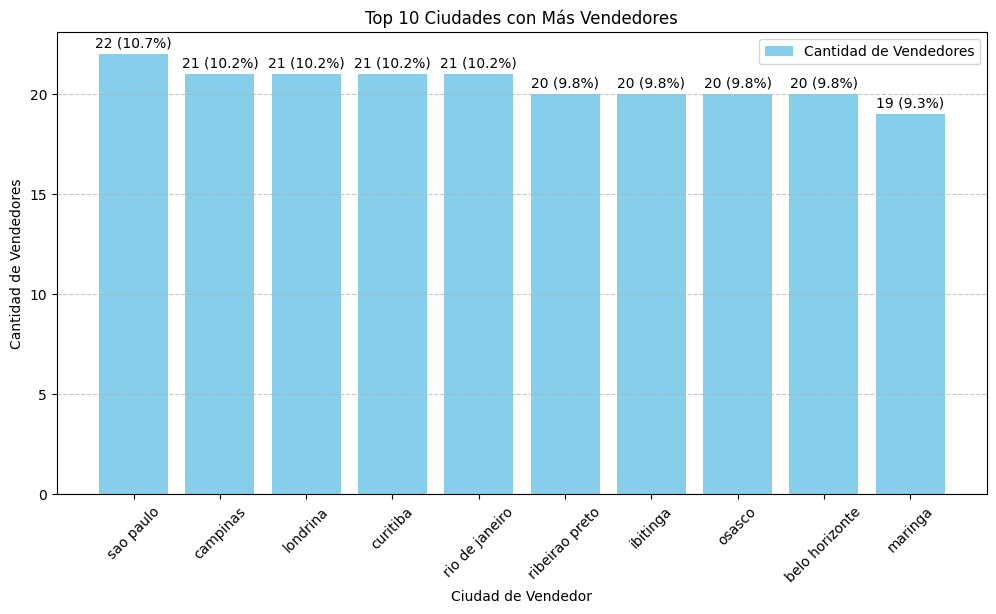

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_cities(top_cities_df):
    # Ordenar las ciudades por cantidad de vendedores (mayor a menor)
    top_cities_df = top_cities_df.sort_values(by="cantidad_vendedores", ascending=False)

    # Grafica los datos
    plt.figure(figsize=(12, 6))
    bar_plot = plt.bar(top_cities_df["seller_city"], top_cities_df["cantidad_vendedores"], color="skyblue")

    # Agrega etiquetas de cantidad y porcentaje en las barras
    total_vendedores = top_cities_df["cantidad_vendedores"].sum()
    for bar in bar_plot:
        height = bar.get_height()
        city = top_cities_df[top_cities_df["cantidad_vendedores"] == height]["seller_city"].values[0]
        percentage = (height / total_vendedores) * 100
        plt.annotate(f"{int(height)} ({percentage:.1f}%)",
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha="center", va="bottom", fontsize=10)

    plt.title("Top 10 Ciudades con Más Vendedores")
    plt.xlabel("Ciudad de Vendedor")
    plt.ylabel("Cantidad de Vendedores")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(["Cantidad de Vendedores"], loc="upper right")  # Leyenda

    plt.show()

# Convierte el resultado a un DataFrame de Pandas para la visualización
top_10_ciudades_df = top_10_ciudades_vendedores.toPandas()

# Muestra el resultado
print("Top 10 Ciudades con Más Vendedores:")
print(top_10_ciudades_df)

# Grafica los datos
plot_top_cities(top_10_ciudades_df)


Top 10 Ciudades con Más Vendedores:
      seller_city  cantidad_vendedores
0       sao paulo                   22
1        campinas                   21
2        londrina                   21
3        curitiba                   21
4  rio de janeiro                   21
5  ribeirao preto                   20
6        ibitinga                   20
7          osasco                   20
8  belo horizonte                   20
9         maringa                   19


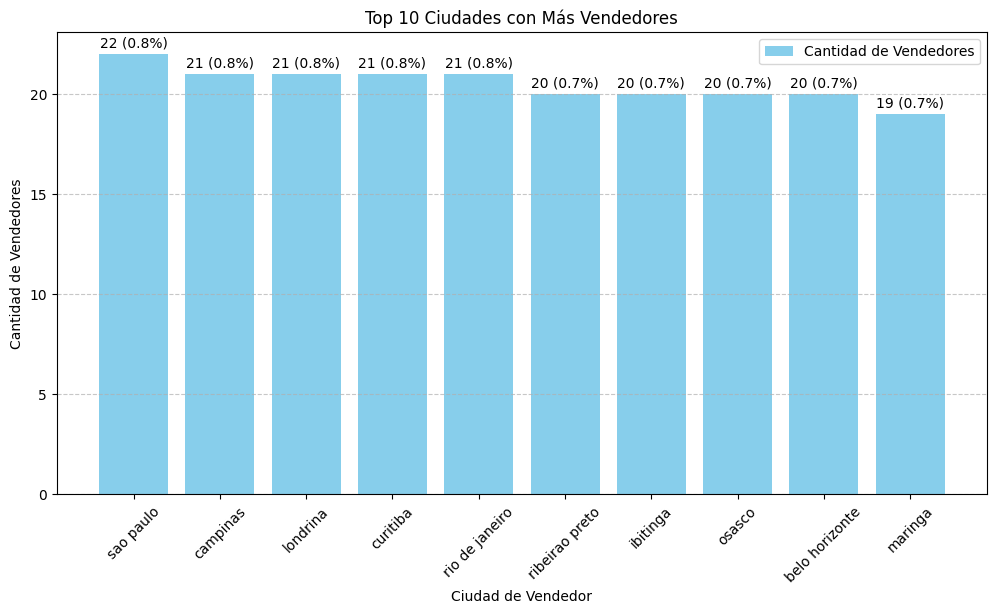

In [ ]:
import matplotlib.pyplot as plt

def plot_top_cities(top_cities_df, total_vendedores):
    # Ordenar las ciudades por cantidad de vendedores (mayor a menor)
    top_cities_df = top_cities_df.sort_values(by="cantidad_vendedores", ascending=False)

    # Grafica los datos
    plt.figure(figsize=(12, 6))
    bar_plot = plt.bar(top_cities_df["seller_city"], top_cities_df["cantidad_vendedores"], color="skyblue")

    # Agrega etiquetas de cantidad y porcentaje en las barras
    for bar in bar_plot:
        height = bar.get_height()
        city = top_cities_df[top_cities_df["cantidad_vendedores"] == height]["seller_city"].values[0]
        percentage = (height / total_vendedores) * 100
        plt.annotate(f"{int(height)} ({percentage:.1f}%)",
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha="center", va="bottom", fontsize=10)

    plt.title("Top 10 Ciudades con Más Vendedores")
    plt.xlabel("Ciudad de Vendedor")
    plt.ylabel("Cantidad de Vendedores")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(["Cantidad de Vendedores"], loc="upper right")  # Leyenda

    plt.show()

# Convierte el resultado a un DataFrame de Pandas para la visualización
top_10_ciudades_df = top_10_ciudades_vendedores.toPandas()
vendedores_por_ciudad_df = vendedores_por_ciudad.toPandas()

# Calcula el total de vendedores fuera de la función y pásalo como argumento
total_vendedores = vendedores_por_ciudad_df["cantidad_vendedores"].sum()

# Muestra el resultado
print("Top 10 Ciudades con Más Vendedores:")
print(top_10_ciudades_df)

# Grafica los datos
plot_top_cities(top_10_ciudades_df, total_vendedores)


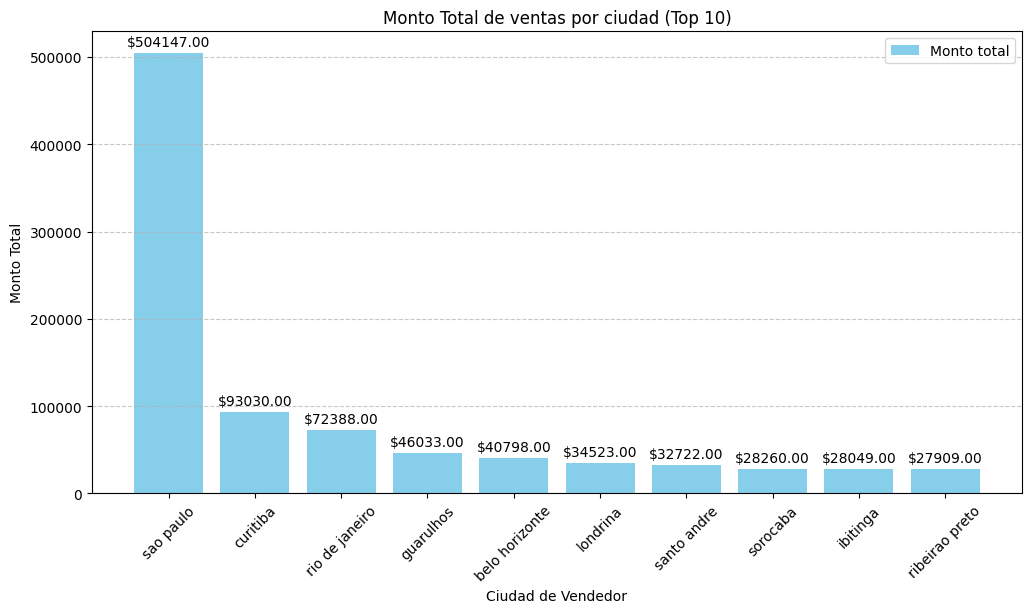

In [ ]:
# Agrupar los datos por seller_city y calcular la suma del precio_total
precio_total_por_ciudad = resultado_70.groupby('seller_city').agg(F.sum('Precio_total').alias('Precio_total')).toPandas()

# Ordenar el DataFrame por precio_total de manera descendente y tomar el Top 10
precio_total_por_ciudad = precio_total_por_ciudad.sort_values(by='Precio_total', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(precio_total_por_ciudad['seller_city'], precio_total_por_ciudad['Precio_total'], color='skyblue')

# Agregar etiquetas de datos en las barras (precio)
for bar in bar_plot:
    height = bar.get_height()
    plt.annotate(f"${height:.2f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha="center", va="bottom", fontsize=10)

# Configuración adicional
plt.title("Monto Total de ventas por ciudad (Top 10)")
plt.xlabel("Ciudad de Vendedor")
plt.ylabel("Monto Total")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(["Monto total"], loc="upper right")

plt.show()



## BBT1 - 78 Carga de datos, generacion de archivos .parquet de análisis A

**Descripción**

COMO: desarrollador

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_A, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.

In [ ]:
ruta_guardado = 'Results_Parquets/Analysis_A/BBT1_78'
resultado_bbt1_68.write.parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets/Analysis_A/BBT1_78


## BBT1 - 79 Carga de datos, generacion de archivos .parquet de análisis B

**Descripción**

COMO: desarrollador

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_B, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.

In [ ]:
ruta_guardado = 'Results_Parquets/Analysis_B/BBT1_79'
resultado_bbt1_69.write.parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets/Analysis_B/BBT1_79


## BBT1 - 80 Carga de datos, generacion de archivos .parquet de análisis C

**Descripción**

COMO: desarrollador

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_C, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.


In [ ]:
ruta_guardado = 'Results_Parquets/Analysis_C/BBT1_80'
resultado_70.write.parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets/Analysis_C/BBT1_80
